In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import pyscisci.all as pyscisci

import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import dask.dataframe as dd

%matplotlib inline

In [3]:
# set this path to where the MAG database will be stored
path2mag = '/home/ajgates/MAG'
path2mag = '/users/hgt6rn/Documents/DataSets/MAG'


In [4]:
mymag = pyscisci.MAG(path2mag, database_extension='csv.gz', enable_dask=True)

In [28]:

magpubs = mymag.load_publications(columns=['PublicationId', 'Year', 'JournalId', 'DocType'],
                                  dropna = ['Year', 'JournalId', 'DocType'])


Loading Publications:   0%|          | 0/132 [00:00<?, ?it/s]

In [29]:
magpubs = magpubs[magpubs['DocType'] == 'j']

In [32]:
npubs_mag = magpubs.groupby('Year')['PublicationId'].nunique().compute()
njournals_mag = magpubs.groupby('Year')['JournalId'].nunique().compute()

In [33]:
mag_values = npubs_mag.to_frame().reset_index().merge(njournals_mag.to_frame().reset_index(), how='left', on='Year')
mag_values = mag_values.rename(columns={'PublicationId':'NumPubs', 'JournalId':'NumJournals'})
mag_values

,Year,NumPubs,NumJournals
0,1800.0,661,38
1,1801.0,165,5
2,1802.0,237,6
3,1805.0,219,5
4,1806.0,233,5
...,...,...,...
218,2022.0,1371,116
219,1803.0,264,5
220,1804.0,198,6
221,1816.0,300,10


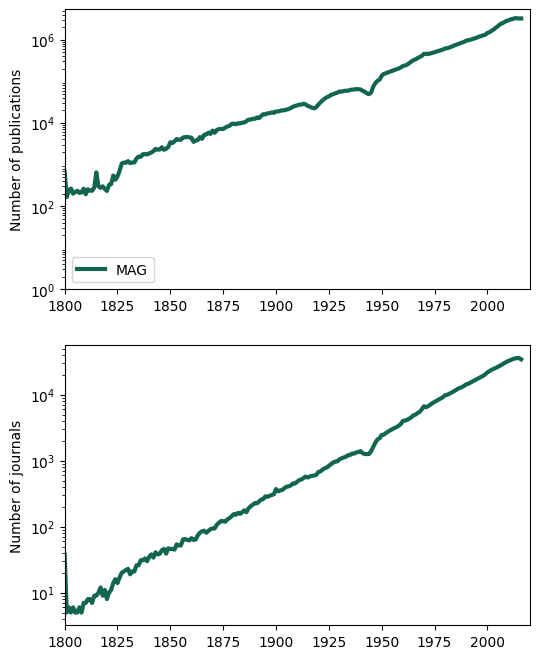

In [37]:

mag_color = '#12664F'

dflabels = ['MAG']
dfcolors = [mag_color]
dfs = [mag_values.sort_values('Year')]

vmax = 2017

fig, ax = plt.subplots(2, 1, figsize=(6, 8))

for idf in range(1):
    idy = np.logical_and(dfs[idf]['Year'].values > 1000, dfs[idf]['Year'].values < vmax)
    for iax,v in enumerate(['NumPubs', 'NumJournals']):
        ax[iax].plot(dfs[idf]['Year'].values[idy], dfs[idf][v].values[idy], lw=3, 
               color=dfcolors[idf], label=dflabels[idf])
    #ax[1].plot(njournals_dblp.index.values[years], njournals_dblp.values[years], lw=2, color=dblp_color)
    #ax[2].plot(nauthors_dblp.index.values[years], nauthors_dblp.values[years], lw=2, color=dblp_color)

ax[0].set_ylabel('Number of publications')
ax[1].set_ylabel('Number of journals')


handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles, labels, loc='lower left')

for iax in range(2):
    ax[iax].set_yscale('log')
    
    ax[iax].set_xlim([1800, 2020])

for iax in [0]:
    ax[iax].set_yticks([10**0, 10**2, 10**4, 10**6])

plt.show()